<a href="https://colab.research.google.com/github/mikakia/Project-in-HealthCare/blob/main/Fertility.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import  missingno as msno

import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC, NuSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

import shap
from lime.lime_tabular import LimeTabularExplainer

from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import partial_dependence
from sklearn.inspection import PartialDependenceDisplay
import dice_ml




#Exploring dataset - Preprocessing

In [ ]:
url = "https://raw.githubusercontent.com/mikakia/Project-in-HealthCare/main/fertilitydataset.txt"
df = pd.read_csv(url, sep=",",header=None,
                 names=["season", "age", "childish_diseases", "accident_trauma","sergical_intervention",
                        "fever","alcohol_freq","smoking","hours_sitting","diagnosis"]
                 )
df

,season,age,childish_diseases,accident_trauma,sergical_intervention,fever,alcohol_freq,smoking,hours_sitting,diagnosis
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O
...,...,...,...,...,...,...,...,...,...,...
95,-1.00,0.67,1,0,0,0,1.0,-1,0.50,N
96,-1.00,0.61,1,0,0,0,0.8,0,0.50,N
97,-1.00,0.67,1,1,1,0,1.0,-1,0.31,N
98,-1.00,0.64,1,0,1,0,1.0,0,0.19,N


In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [ ]:
df.describe()

In [ ]:
df.corr(numeric_only=True)

In [ ]:
#Pairplots
numeric_cols = ["season", "age", "childish_diseases", "accident_trauma","sergical_intervention","fever","alcohol_freq","smoking","hours_sitting"]

sns.pairplot(df, vars=numeric_cols, hue='diagnosis', diag_kind='hist', palette='Set1')
plt.show()

In [ ]:
# 0-> Normal (N), 1-> Altered(O)
df['diagnosis'] = LabelEncoder().fit_transform(df['diagnosis'])
df.head()

In [ ]:
df['diagnosis'].value_counts()

#Training and Test Phase

In [ ]:
X = df.drop('diagnosis', axis=1)  # all features
y = df['diagnosis']               # target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
#smooth imbalanced data with SMOT
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

##Logistic Regression
accuracy: 65%

In [ ]:
log_reg = LogisticRegression(class_weight='balanced',random_state=42) #using class_weight due to imbalanced data
log_reg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [ ]:
y_pred_log = log_reg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_log))

Accuracy: 0.65

Classification Report:
               precision    recall  f1-score   support

           N       0.92      0.67      0.77        18
           O       0.14      0.50      0.22         2

    accuracy                           0.65        20
   macro avg       0.53      0.58      0.50        20
weighted avg       0.85      0.65      0.72        20


Confusion Matrix:
 [[12  6]
 [ 1  1]]


##Decision Tree
Accuracy: 85%

In [ ]:
des_tree = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=42)
des_tree.fit(X_train_res, y_train_res)


DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=42)

In [ ]:
y_pred_tree = des_tree.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Classification Report:")
print(classification_report(y_test, y_pred_tree))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_tree))

Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           N       0.94      0.89      0.91        18
           O       0.33      0.50      0.40         2

    accuracy                           0.85        20
   macro avg       0.64      0.69      0.66        20
weighted avg       0.88      0.85      0.86        20

Confusion Matrix:
[[16  2]
 [ 1  1]]


In [ ]:
# 20 predictions
for true, y_pred_tree in zip(y_test[:20], y_pred_tree[:20]):
    print(f"True: {true} → Predicted: {y_pred_tree}")

True: N → Predicted: N
True: N → Predicted: N
True: N → Predicted: O
True: N → Predicted: N
True: N → Predicted: N
True: N → Predicted: N
True: N → Predicted: N
True: O → Predicted: N
True: N → Predicted: N
True: N → Predicted: N
True: N → Predicted: N
True: O → Predicted: O
True: N → Predicted: N
True: N → Predicted: N
True: N → Predicted: N
True: N → Predicted: N
True: N → Predicted: N
True: N → Predicted: N
True: N → Predicted: N
True: N → Predicted: O


##Random Forest
Accuracy: 85%

In [ ]:
rand_fo = RandomForestClassifier(random_state=42)
rand_fo.fit(X_train_res, y_train_res)

In [ ]:
y_pred_rf = rand_fo.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

##Gradient Bossting
Accuracy: 85%

In [ ]:
gb_model = GradientBoostingClassifier(n_estimators=40,learning_rate=0.05,max_depth=3,random_state=42)
gb_model.fit(X_train_res, y_train_res)

GradientBoostingClassifier(learning_rate=0.05, n_estimators=40, random_state=42)

In [ ]:
y_pred_gb = gb_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))

Accuracy: 0.85
Classification Report:
               precision    recall  f1-score   support

           N       0.94      0.89      0.91        18
           O       0.33      0.50      0.40         2

    accuracy                           0.85        20
   macro avg       0.64      0.69      0.66        20
weighted avg       0.88      0.85      0.86        20

Confusion Matrix:
[[16  2]
 [ 1  1]]


##Neural Network
Accuracy: 75%

In [ ]:

nn_model = MLPClassifier(hidden_layer_sizes=(100,), activation='tanh', max_iter=300, random_state=42)
nn_model.fit(X_train_res, y_train_res)

In [ ]:
y_pred_nn = nn_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_nn))
print("Classification Report:\n", classification_report(y_test, y_pred_nn))
print("Confusion Matric\n",confusion_matrix(y_test, y_pred_nn))

##KNN
Accuracy: 80%

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=4, metric='manhattan')
knn_model.fit(X_train_res, y_train_res)

In [ ]:
y_pred_knn = knn_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matric\n",confusion_matrix(y_test, y_pred_knn))

###KNN with kfolds
Accuracy: 88%

In [ ]:
from sklearn.model_selection import KFold, cross_val_score,cross_val_predict
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
scores = cross_val_score(knn_model, X, y, cv=kf, scoring='accuracy')

print("Accuracy for each fold:", scores)
print("Mean accuracy:", scores.mean())

# Explainability

## SHAP

In [ ]:
explainer = shap.TreeExplainer(des_tree)
shap_values = explainer.shap_values(X_test)

In [ ]:
shap_values = explainer.shap_values(X_test)
type(shap_values)
len(shap_values)
shap_values[0].shape  # (num_samples, num_features)
shap_values[1].shape


In [ ]:
shap_values_class0 = shap_values[:, :, 0] # normal

In [ ]:
shap_values_class1 = shap_values[:, :, 1] # altered

In [ ]:
# Mean absolute SHAP value per feature
mean_shap = np.abs(shap_values_class1).mean(axis=0)

# feature names
shap_importance = pd.Series(mean_shap, index=X_train.columns)

# Top features
top_features = shap_importance.sort_values(ascending=False)
print("Top influential features for class 1:")
print(top_features)


Top influential features for class 1:
season                   0.193947
alcohol_freq             0.141041
age                      0.132401
hours_sitting            0.071212
sergical_intervention    0.033724
accident_trauma          0.011391
childish_diseases        0.000000
fever                    0.000000
smoking                  0.000000
dtype: float64


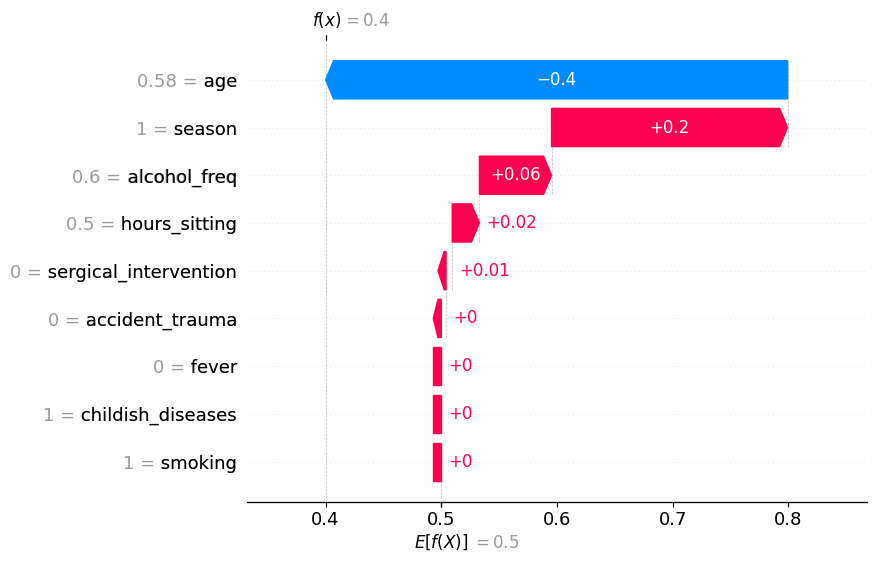

In [ ]:

i = 0  # first sample
instance_shap = shap_values_class1[i]
instance_base_value = explainer.expected_value[1]  # altered
instance_features = X_test.iloc[i]

shap.plots.waterfall(
    shap.Explanation(
        values=instance_shap,
        base_values=instance_base_value,
        data=instance_features,
        feature_names=X_train.columns
    )
)

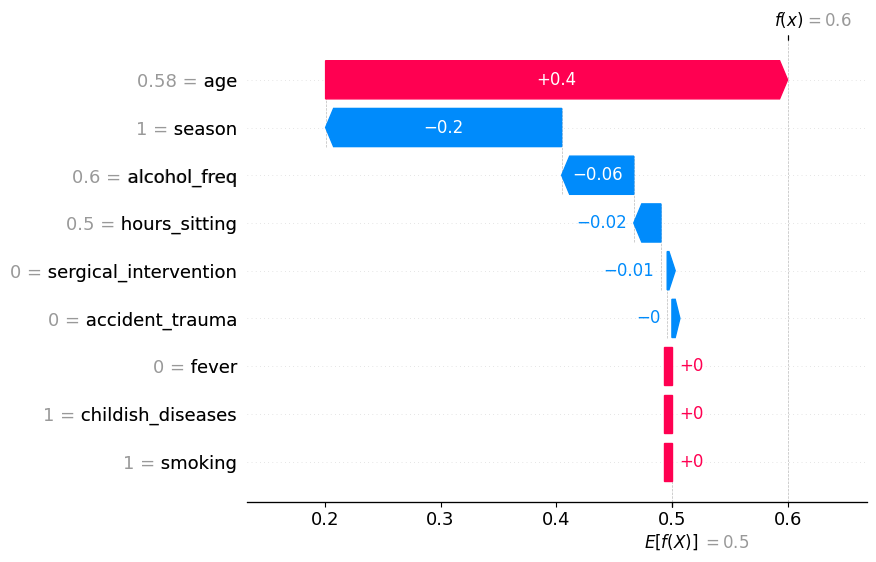

In [ ]:

i = 0  # first sample
instance_shap = shap_values_class0[i]  # normal
instance_base_value = explainer.expected_value[1]
instance_features = X_test.iloc[i]

shap.plots.waterfall(
    shap.Explanation(
        values=instance_shap,
        base_values=instance_base_value,
        data=instance_features,
        feature_names=X_train.columns
    )
)

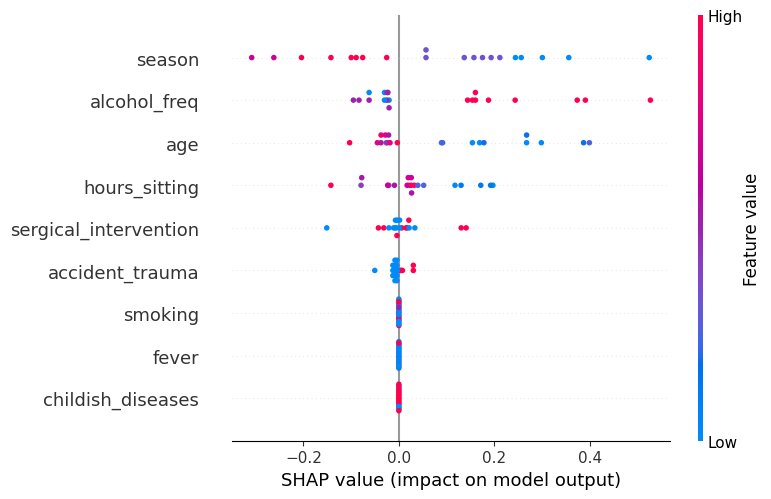

In [ ]:
# Normal
shap.summary_plot(shap_values[:, :, 0], X_test)

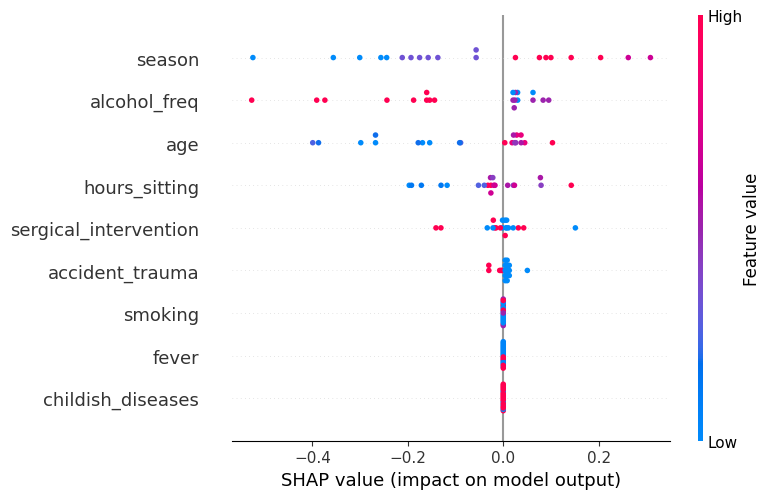

In [ ]:
# altered
shap.summary_plot(shap_values_class1, X_test, plot_type='dot')


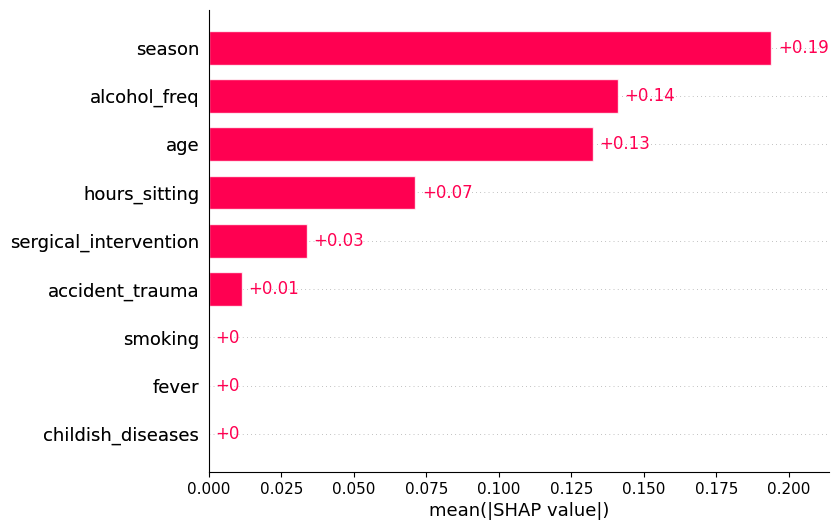

In [ ]:
# Bar plot of mean absolute SHAP values for Altered
shap.plots.bar(
    shap.Explanation(
        values=shap_values_class1,
        data=X_test,
        feature_names=X_test.columns
    )
)

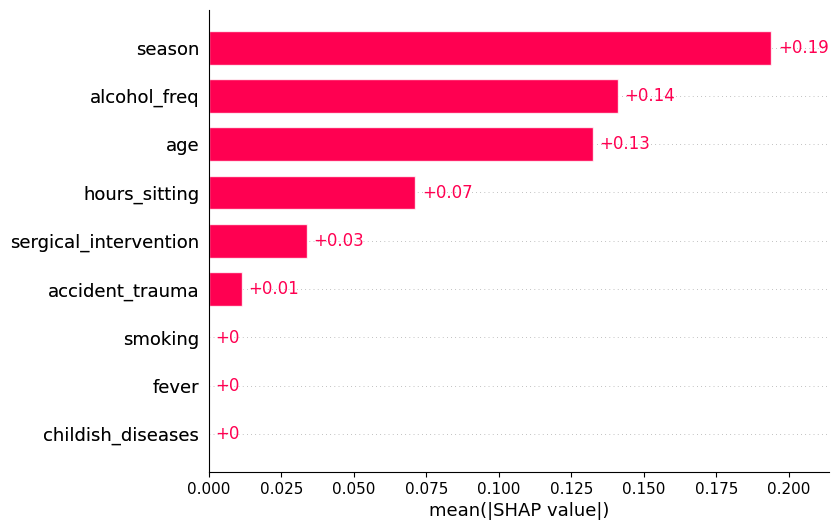

In [ ]:

# Bar plot of mean absolute SHAP values Normal
shap.plots.bar(
    shap.Explanation(
        values=shap_values_class0,
        data=X_test,
        feature_names=X_test.columns
    )
)

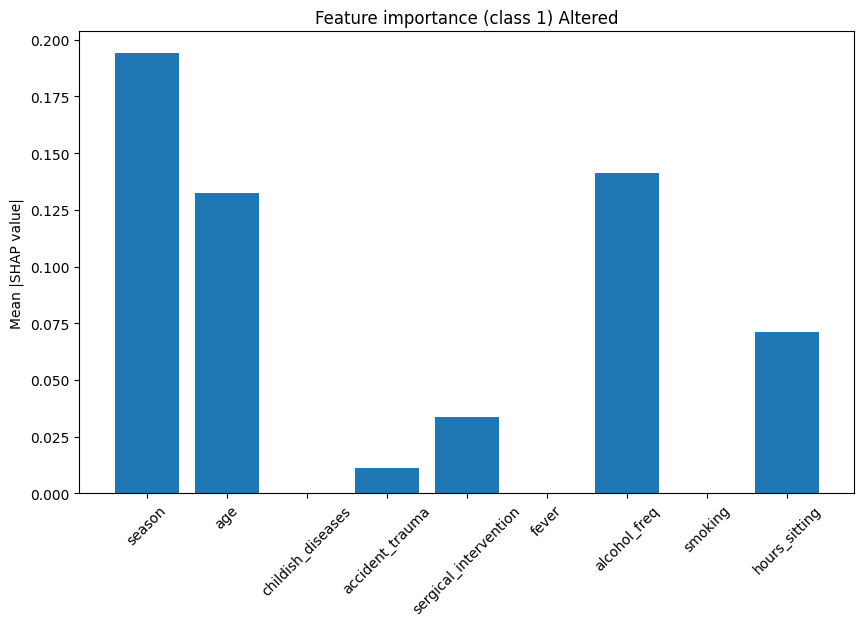

In [ ]:
shap_values_class1_mean = np.abs(shap_values_class1).mean(axis=0)

plt.figure(figsize=(10,6))
plt.bar(X_test.columns, shap_values_class1_mean)
plt.xticks(rotation=45)
plt.ylabel("Mean |SHAP value|")
plt.title("Feature importance (class 1) Altered")
plt.show()


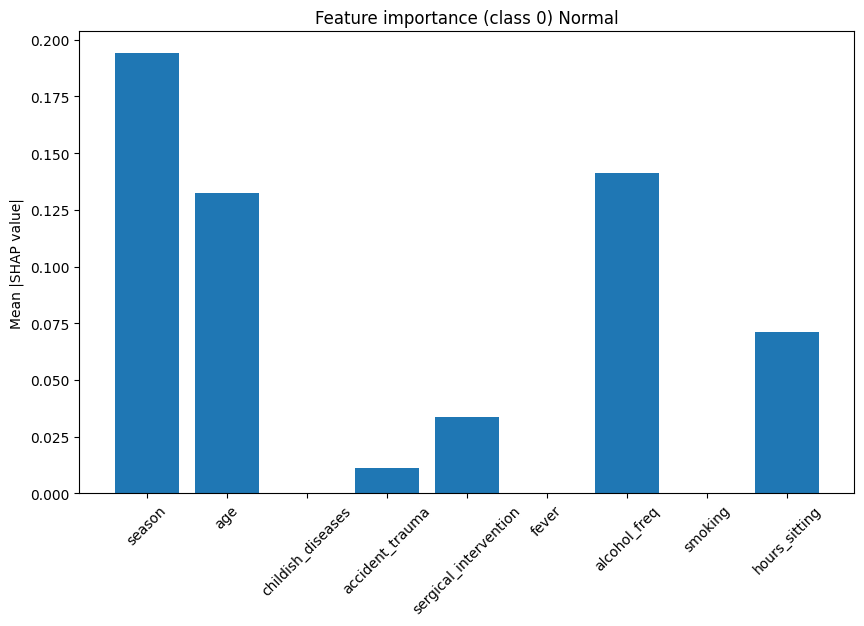

In [ ]:
shap_values_class0_mean = np.abs(shap_values_class0).mean(axis=0)

plt.figure(figsize=(10,6))
plt.bar(X_test.columns, shap_values_class0_mean)
plt.xticks(rotation=45)
plt.ylabel("Mean |SHAP value|")
plt.title("Feature importance (class 0) Normal")
plt.show()


## LIME

In [ ]:
explainer = LimeTabularExplainer(X.values,
                                 feature_names=X.columns,
                                 class_names=['diagnosis'],
                                 mode='regression',
                                 random_state=101)


In [ ]:
print(X.columns)


Index(['season', 'age', 'childish_diseases', 'accident_trauma',
       'sergical_intervention', 'fever', 'alcohol_freq', 'smoking',
       'hours_sitting'],
      dtype='object')


In [ ]:
explainer = LimeTabularExplainer(
    training_data=X.values,
    feature_names=X.columns,
    class_names=['N', 'O'],  # two classes
    mode='classification',
    random_state=101
)

In [ ]:
i = 0
exp = explainer.explain_instance(
    X.iloc[i].values,
    des_tree.predict_proba,
    num_features=5
)

exp.show_in_notebook(show_table=True)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## PDB AND ICE PLOTS

### PDB

### PDB + ICE

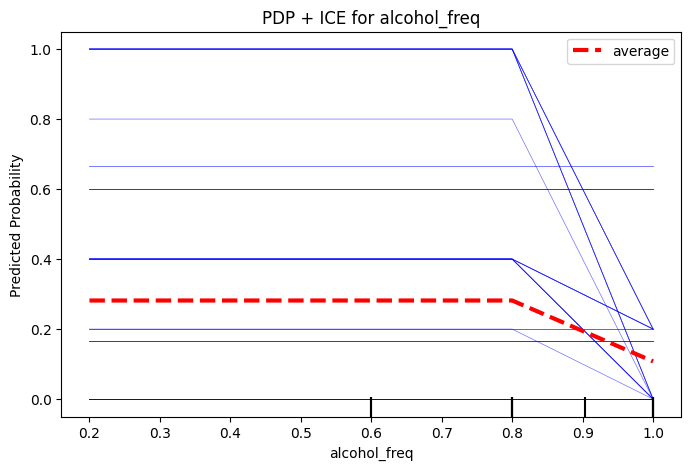

In [ ]:
feature_to_plot = 'alcohol_freq'

fig, ax = plt.subplots(figsize=(8,5))

PartialDependenceDisplay.from_estimator(
    des_tree,
    X,
    features=[feature_to_plot],
    kind='both',      # shows PDP + ICE
    ice_lines_kw={'color':'blue', 'alpha':0.3},
    pd_line_kw={'color':'red', 'lw':3, 'linestyle':'--'},
    ax=ax
)

plt.ylabel('Predicted Probability')
plt.xlabel(feature_to_plot)
plt.title(f'PDP + ICE for {feature_to_plot}')
plt.show()


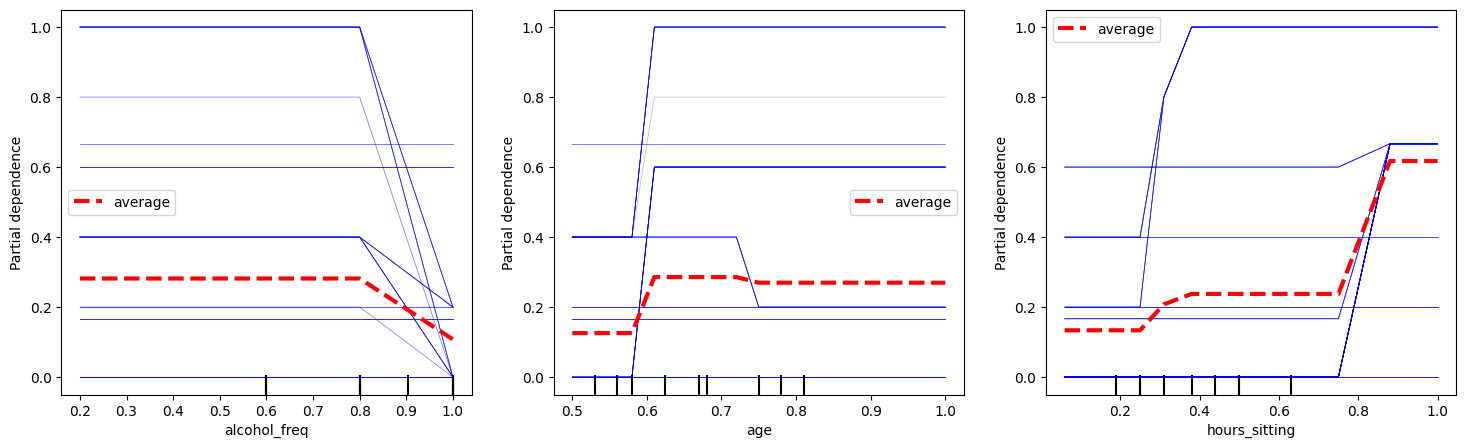

In [ ]:
features_to_plot = ['alcohol_freq', 'age', 'hours_sitting']  # top 3 features

fig, axes = plt.subplots(1, 3, figsize=(18,5))

PartialDependenceDisplay.from_estimator(
    des_tree,
    X,
    features=features_to_plot,
    kind='both',
    ice_lines_kw={'color':'blue', 'alpha':0.3},
    pd_line_kw={'color':'red', 'lw':3, 'linestyle':'--'},
    ax=axes
)
plt.show()


## DiCE

In [ ]:
train_df = pd.concat([X_train, y_train.rename('diagnosis')], axis=1)

d = dice_ml.Data(
    dataframe=train_df,
    continuous_features=X_train.columns.tolist(),
    outcome_name='diagnosis'
)

m = dice_ml.Model(model=des_tree, backend='sklearn')

# DiCE explainer
exp = dice_ml.Dice(d, m, method='random')


In [ ]:
query_instance = X_test.iloc[[0]]
counterfactuals = exp.generate_counterfactuals(
    query_instances=query_instance,
    total_CFs=3,             # number of counterfactuals to generate
    desired_class='opposite', # prediction flip
    features_to_vary=X_train.columns.tolist()  # all features to change
)


100%|██████████| 1/1 [00:00<00:00,  8.21it/s]


In [ ]:
counterfactuals.visualize_as_dataframe()


Query instance (original outcome : N)


,season,age,childish_diseases,accident_trauma,sergical_intervention,fever,alcohol_freq,smoking,hours_sitting,diagnosis
0,1.0,0.58,1,0,0,0,0.6,1,0.5,N



Diverse Counterfactual set (new outcome: O)


,season,age,childish_diseases,accident_trauma,sergical_intervention,fever,alcohol_freq,smoking,hours_sitting,diagnosis
0,1.0,0.98,0,0,0,0,0.6,1,0.5,O
1,1.0,0.82,1,0,0,0,0.6,1,0.5,O
2,1.0,0.70,0,0,0,0,0.6,1,0.5,O


In [ ]:
cf_df = counterfactuals.cf_examples_list[0].final_cfs_df


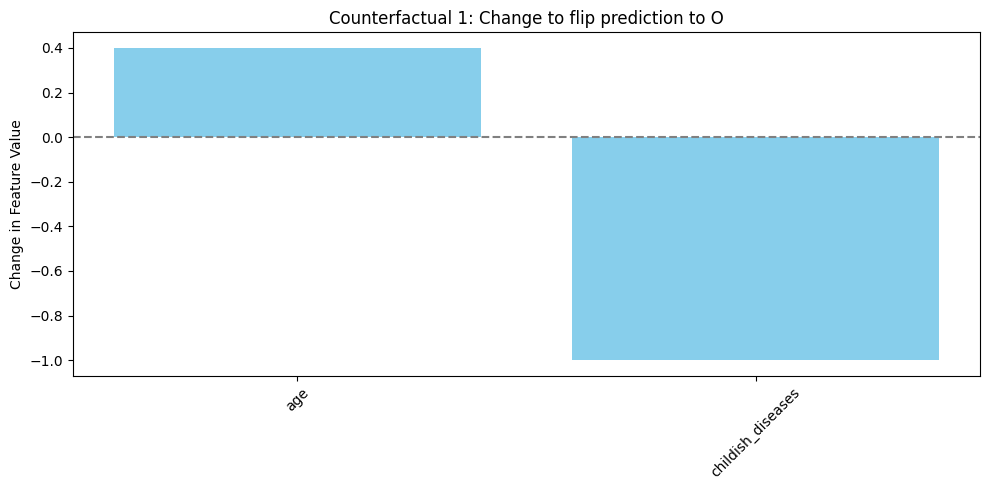

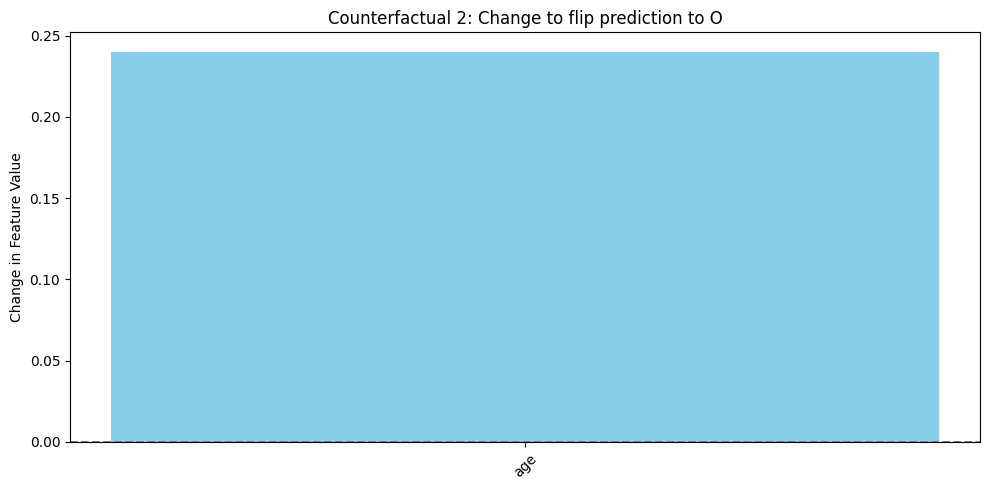

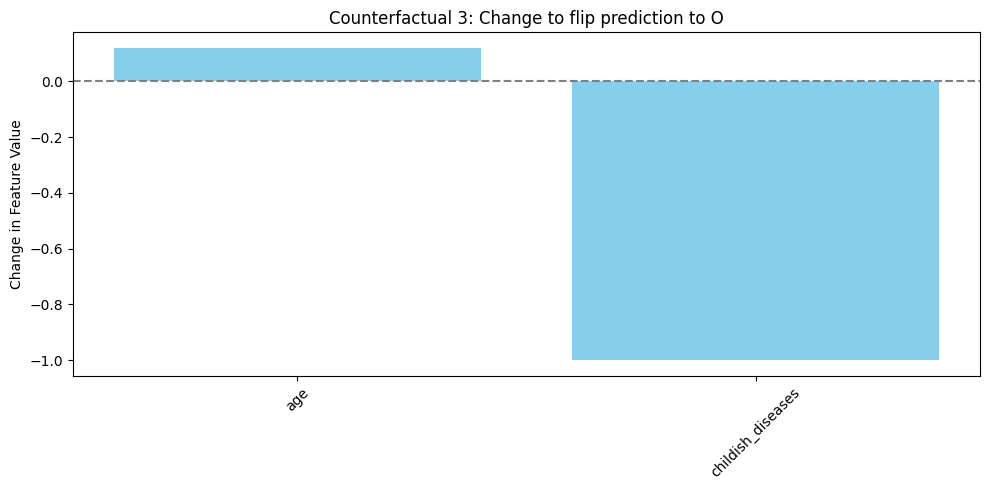

In [ ]:
original = query_instance.iloc[0]

for i, cf in cf_df.iterrows():
    # changes only for features that changed
    changes = {col: cf[col] - original[col] for col in X_train.columns if cf[col] != original[col]}

    plt.figure(figsize=(10,5))
    plt.bar(changes.keys(), changes.values(), color='skyblue')
    plt.axhline(0, color='gray', linestyle='--')
    plt.ylabel('Change in Feature Value')
    plt.title(f'Counterfactual {i+1}: Change to flip prediction to {cf["diagnosis"]}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
